# Run the whole deltas algorithm

In [204]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

/home/matt/projects/linear_confidence/deltas/data/loaders/ionosphere.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({34: {'b': 0, 'g': 1}})


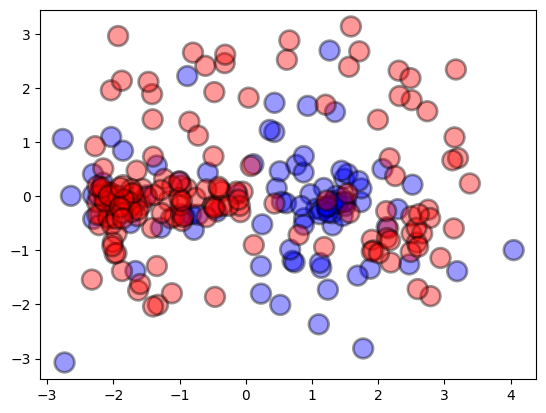

In [205]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing'}
dataset = datasets[8]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=False)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

clf


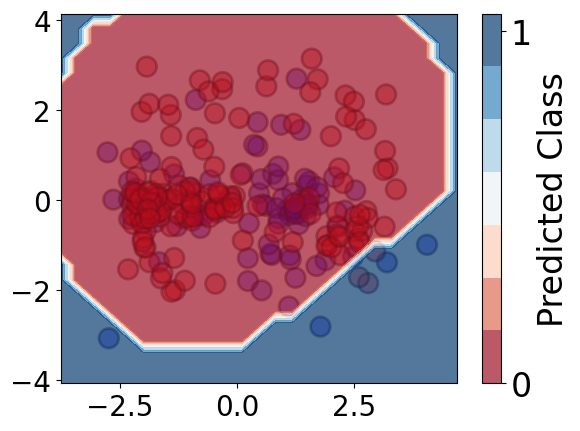

SMOTE


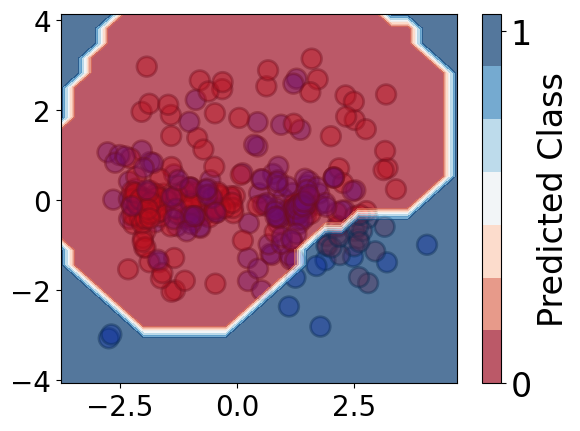

In [206]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


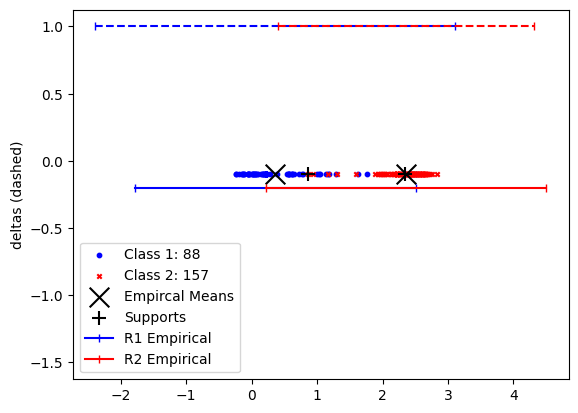

Budget 243 found 131 viable downsampled solutions
Best solution found by removing 138 data points
Downsampled Data:


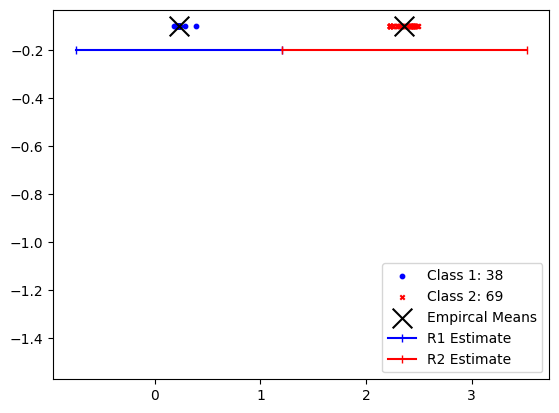

In [223]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=0, 
                                                     _print=True, 
                                                     _plot=True, 
                                                     max_trials=1000, 
                                                     method='supports-prop-update_mean',
                                                     parallel=False)

## Plot training data information

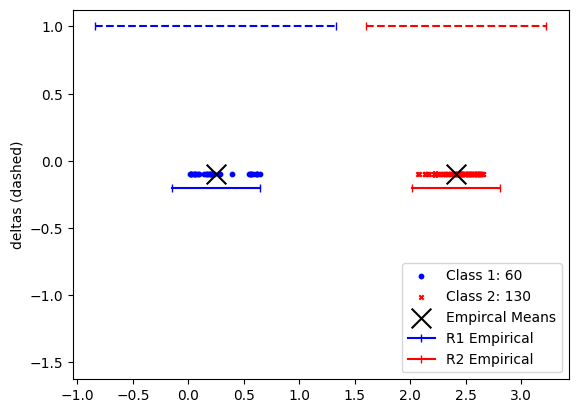

In [208]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [209]:
deltas_model.print_params()

Parameters
                R:  2.6564542872267567
                N1: 60
                N2: 130
                R1: 0.3993358186899102
                R2: 0.346621279295229
                M:  1.417840238584179
                D:  2.1637973365693184
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.9245283018867925
SMOTE accuracy: 0.9528301886792453
deltas accuracy: 0.9245283018867925

original F1: 0.9444444444444444
SMOTE F1: 0.9645390070921985
deltas F1: 0.9444444444444444

original precision0: 1.0
SMOTE precision0: 1.0
deltas precision0: 1.0

original precision1: 0.8947368421052632
SMOTE precision1: 0.9315068493150684
deltas precision1: 0.8947368421052632

original


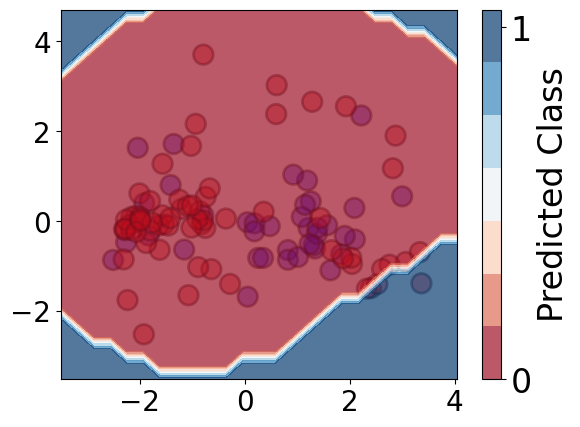

SMOTE


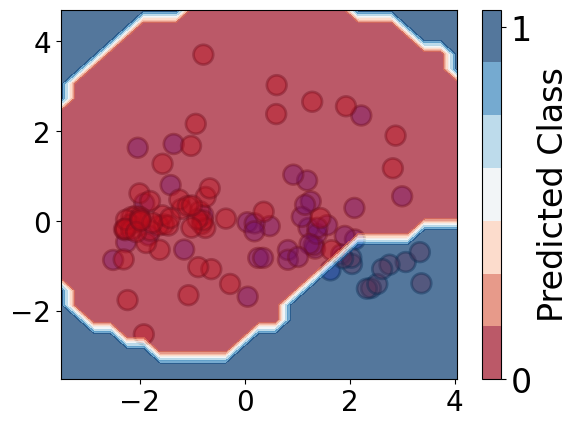

deltas


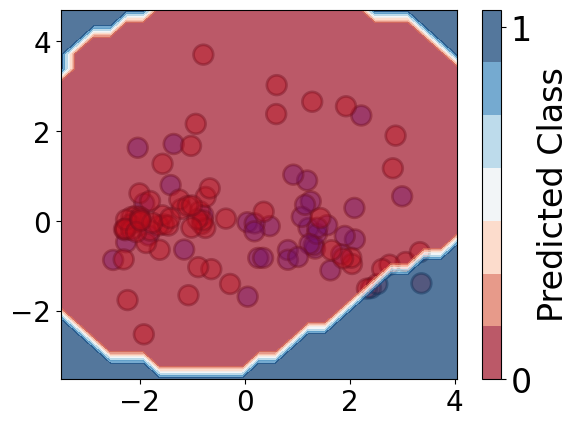

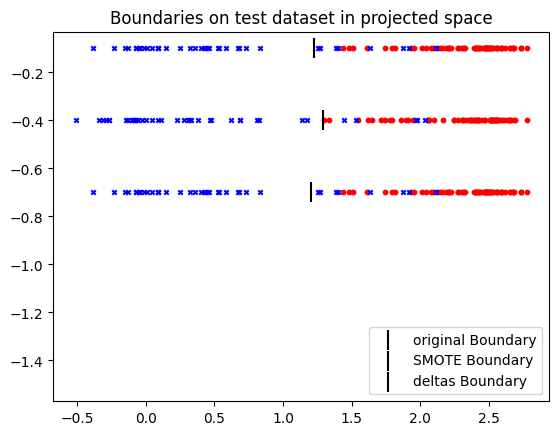

In [224]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])